In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load data
df = pd.read_csv("../data/processed/hotel_prices_dummy.csv")
df['date'] = pd.to_datetime(df['date'])


In [37]:
# Extract date features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

# Encode hotel names
le = LabelEncoder()
df['hotel_encoded'] = le.fit_transform(df['hotel'])
with open("../models/hotel_name_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Features and target
X = df[['hotel_encoded', 'rating', 'day', 'month', 'weekday']]
y = df['price']


In [38]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [39]:
# Print column names
print("X_train columns:", X_train.columns.tolist())
print("X_test columns :", X_test.columns.tolist())

# Check if they are exactly equal
print("Columns match exactly:", X_train.columns.equals(X_test.columns))

# Optionally, check for extra/missing columns
print("Columns in X_train but not in X_test:", set(X_train.columns) - set(X_test.columns))
print("Columns in X_test but not in X_train:", set(X_test.columns) - set(X_train.columns))

X_train columns: ['hotel_encoded', 'rating', 'day', 'month', 'weekday']
X_test columns : ['hotel_encoded', 'rating', 'day', 'month', 'weekday']
Columns match exactly: True
Columns in X_train but not in X_test: set()
Columns in X_test but not in X_train: set()


In [40]:
print("X_train dtypes:\n", X_train.dtypes)
print("X_test dtypes:\n", X_test.dtypes)


X_train dtypes:
 hotel_encoded      int64
rating           float64
day                int32
month              int32
weekday            int32
dtype: object
X_test dtypes:
 hotel_encoded      int64
rating           float64
day                int32
month              int32
weekday            int32
dtype: object


In [41]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = model.predict(X_test)   # Predict on test data

# Metrics for evaluation (actual vs predicted data)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


RMSE: 74.66
R2 Score: -0.40


In [43]:
import pickle

# Train model (already done)
model.fit(X_train, y_train)

# Save model again
with open("../models/hotel_price_model.pkl", "wb") as f:
    pickle.dump(model, f)


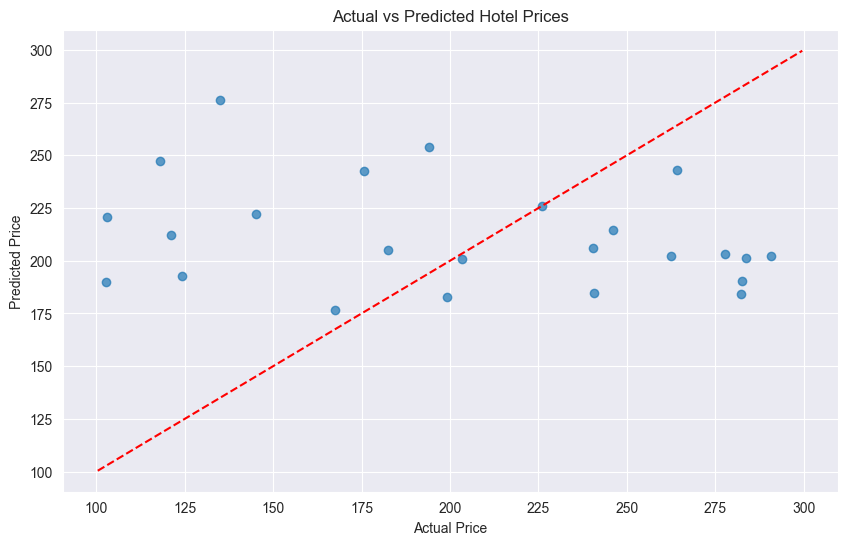

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Hotel Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()